In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Reshape, Dropout, Flatten, LeakyReLU, Conv2D
from keras.layers import UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import initializers
import cv2
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
latent_dim = 100
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32)-127.5)/127.5 # Normalizing
x_train = x_train[0:5000,np.newaxis,:,:]

generator = Sequential()
generator.add(Dense(128*7*7, input_dim = 100))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128,7,7)))
generator.add(UpSampling2D(size=(2,2)))
generator.add(Conv2D(64, kernel_size=(5,5), padding = 'same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2,2)))
generator.add(Conv2D(1, kernel_size = (5,5), padding='same', activation='tanh'))

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding='same',
                        input_shape=(1,28,28), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5,5), strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

generator.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=0.0002, beta_1=0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))


discriminator.trainable = False
ganInput = Input(shape = (latent_dim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001))

W0818 08:31:21.321492  7372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 08:31:21.754886  7372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 08:31:21.894835  7372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 08:31:22.142774  7372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0818 08:31:22.227232  7372 depreca

In [3]:
dLosses = []
gLosses = []

def plotLoss(epochs):
    plt.figure(figsize=(10,10))
    plt.plot(dLosses, label = 'Discriminative Loss')
    plt.plot(gLosses, label = 'Generative loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plotGeneratedImages(epoch, examples = 10, dim = (2,5), figsize = (10,10)):
    noise = np.random.normal(0, 1, size=[examples, latent_dim])
    generatedImages = generator.predict(noise)
    
    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1 )
        plt.imshow(generatedImages[i, 0])
        plt.imshow(generatedImages[i, 0], interpolation = 'nearest', cmap = 'gray_r')
        plt.axis('off')
    plt.tight_layout()
    
def saveModels(epoch):
    generator.save('C://Users//HP//Downloads//DeepLearningCV-master//images//dcgan_generator_epoch_%d.h5' % epochs)
    discriminator.save('C://Users//HP//Downloads//DeepLearningCV-master//images//dcgan_discriminator_epoch_%d.h5' % epochs)

--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
--------------- Epoch 24 ---------------
--------------- Epoch 25 

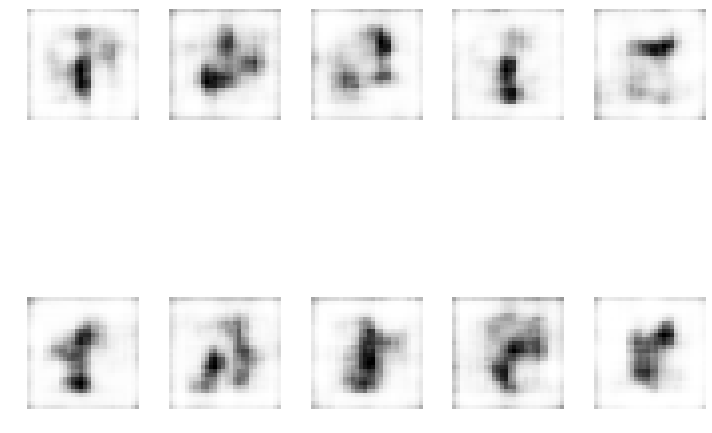

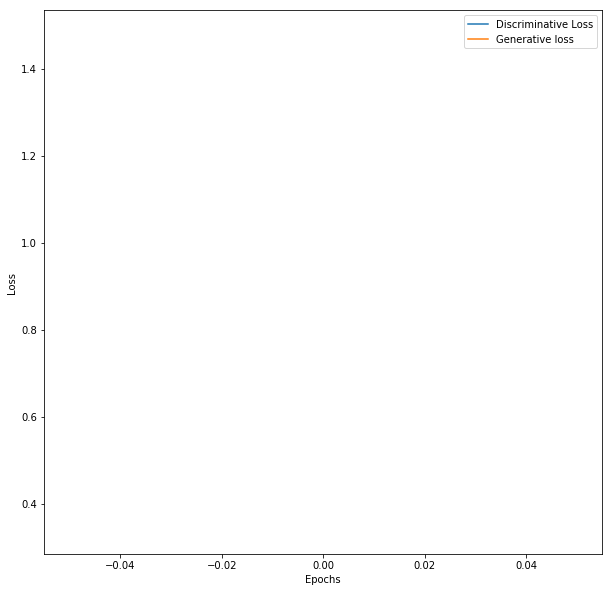

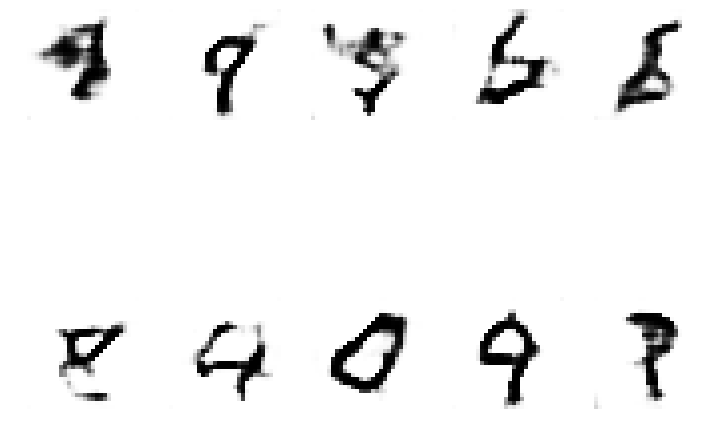

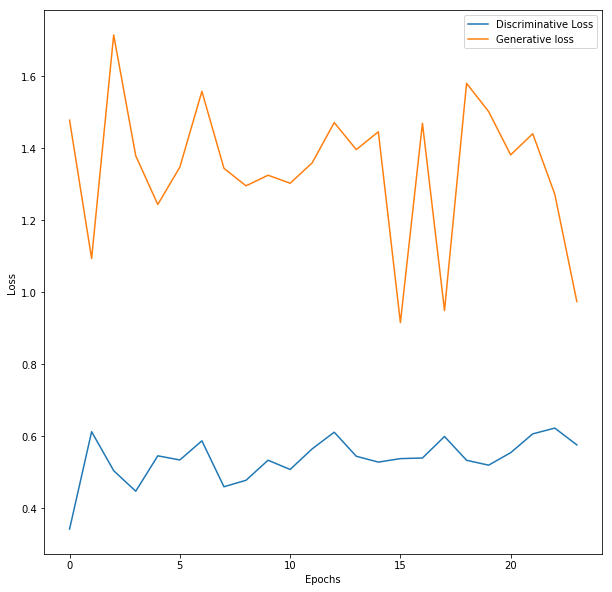

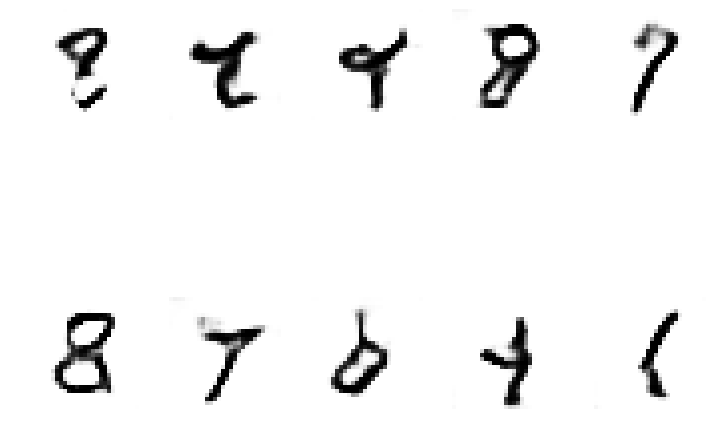

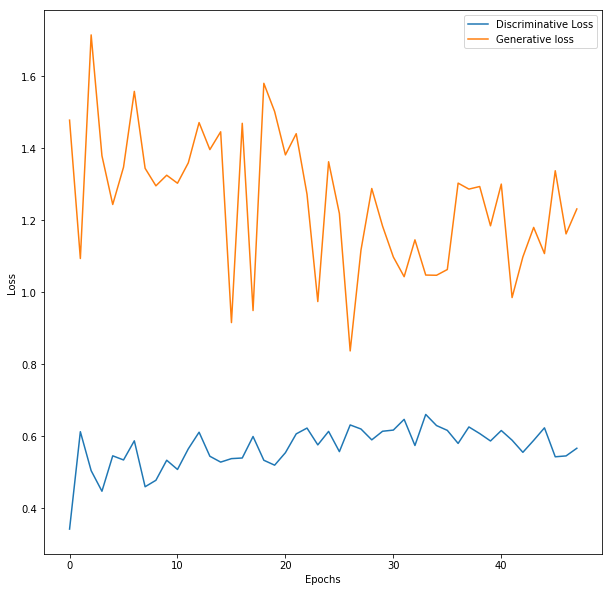

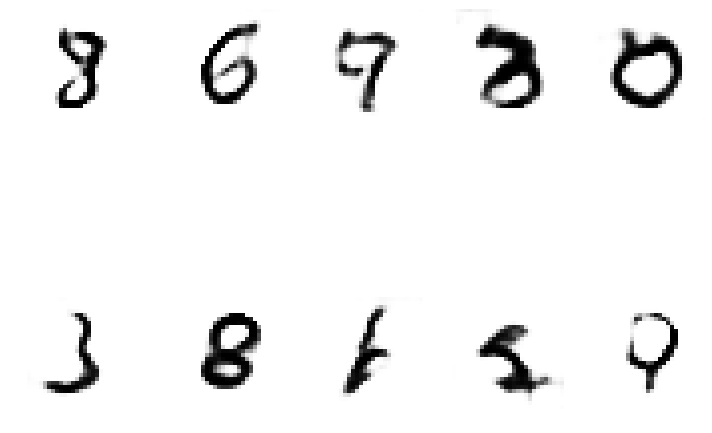

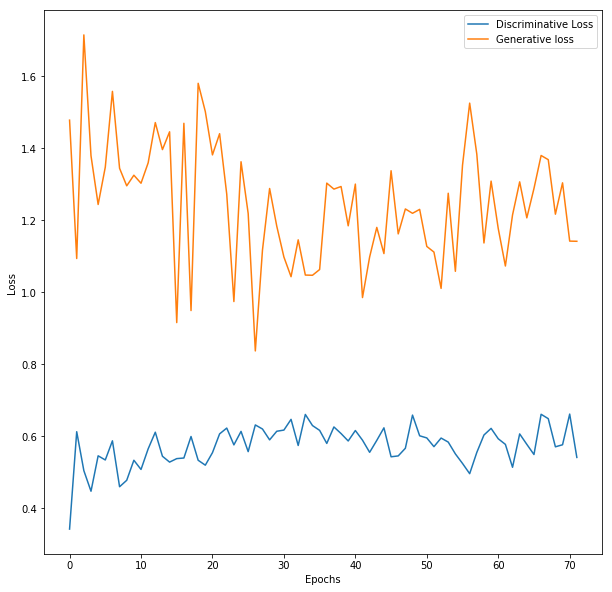

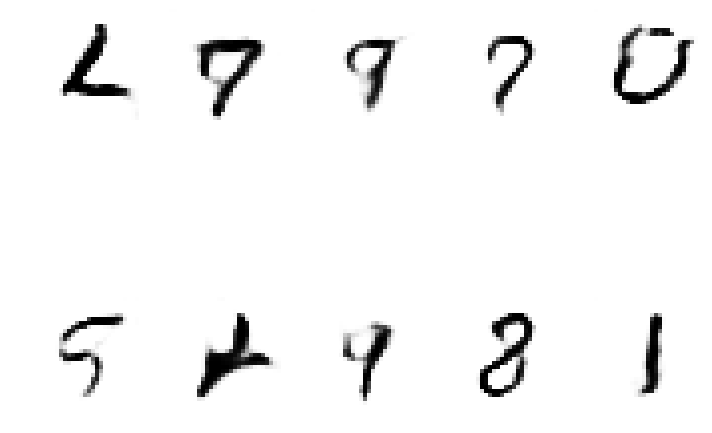

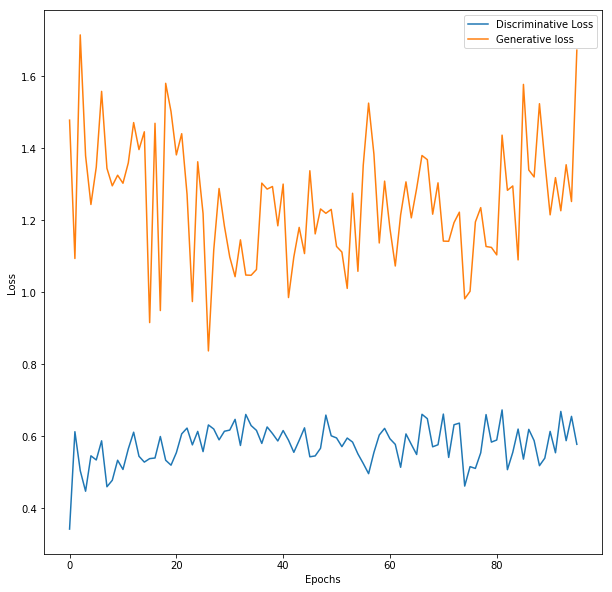

In [4]:
epochs = 100
batchSize = 32
batchCount = x_train.shape[0]/batchSize
for e in range(1, epochs+1):
    print('-'*15, 'Epoch %d' % e, '-'*15)
    for i in range(int(batchCount)):
        noise = np.random.normal(0,1,size=[batchSize, latent_dim])
        imageBatch = x_train[np.random.randint(0, x_train.shape[0], size=batchSize)]
        generatedImages = generator.predict(noise)
        X= np.concatenate([imageBatch, generatedImages])
        yDis = np.zeros(2*batchSize) 
        yDis[:batchSize] = 0.9 
        discriminator.trainable = True 
        dloss = discriminator.train_on_batch(X, yDis) 
        noise = np.random.normal(0,1, size=[batchSize, latent_dim])
        yGen = np.ones(batchSize)
        discriminator.trainable = False 
        gloss = gan.train_on_batch(noise, yGen) 
    dLosses.append(dloss)
    gLosses.append(gloss)
    if e == 1 or e % 24 == 0:
        plotGeneratedImages(e)
        plotLoss(e)
        saveModels(e)